
# **Projeto IC (Atividade para a P2)**

**Objeto de Estudo:** Predição da Nota Final (G3)

**Dataset:** Students Alcohol Consumption *(UCI Adaptado - Kaggle)*

**Integrantes do Grupo:**  
- Ariel Ladislau Reises  
- João Paulo Martins de Brito  
- Matheus Castro Alexandre  

Este notebook também está disponível no [**GitHub**](https://github.com/arielreises/InteligenciaComputacional/blob/main/IC_Students_Alcohol_(REISES%2C_CASTRO%2C_BRITO).ipynb).


### **Objetivo do Notebook:**

Conduzir, de ponta a ponta, um projeto completo de Mineração de Dados aplicado a um problema de regressão, utilizando técnicas modernas de Aprendizado Supervisionado. O trabalho abrange todas as etapas do processo analítico: exploração inicial dos dados, tratamento e limpeza, engenharia de atributos, construção de pipelines reprodutíveis, otimização de hiperparâmetros, validação cruzada e comparação entre diferentes modelos preditivos (como `LinearRegression`, `DecisionTreeRegressor` e `RandomForestRegressor`).

Além da modelagem em si, o notebook também inclui a interpretação dos resultados por meio de métricas, gráficos de importância de variáveis e análise socioeconômica dos fatores que influenciam a variável-alvo, garantindo um estudo completo, estruturado e orientado à tomada de decisão baseada em dados.


## **Instruções rápidas (Google Colab)**
1. Este notebook foi preparado para rodar aqui mesmo no **Google Colab**.  
2. O carregamento do dataset usa **kagglehub**, que não exige `kaggle.json` no Colab.  
3. Execute as células na ordem. Cada célula tem comentários explicativos.  
4. No final há análises extras e sugestões de interpretação para o relatório.

In [1]:
# Instalação de dependências
!pip install kagglehub[pandas-datasets] -q
!pip install scikit-learn pandas numpy matplotlib seaborn -q

In [56]:
# Importações
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


## **1) Carregamento dos dados**
O dataset possui dois arquivos (`student-mat.csv` e `student-por.csv`). Vamos carregar ambos e concatenar, adicionando a coluna `subject` para diferenciar disciplinas.


In [ ]:
# Nomes dos arquivos dentro do dataset Kaggle
mat_file = "student-mat.csv"
por_file = "student-por.csv"

In [ ]:
# Carregamento via kagglehub (retorna DataFrame pandas)
df_mat = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "uciml/student-alcohol-consumption", mat_file)
df_por = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "uciml/student-alcohol-consumption", por_file)

In [60]:
# Marcar disciplina e concatenar
df_mat["subject"] = "math"
df_por["subject"] = "portuguese"
df = pd.concat([df_mat, df_por], ignore_index=True)

print("Tamanho do dataset combinado:", df.shape)

Tamanho do dataset combinado: (1044, 34)


In [61]:
df.head(6)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,math



## **2) Inspeção inicial e resumo das variáveis**
Verificamos tipos, valores ausentes e uma leitura inicial dos dados.


In [4]:
# Informações gerais do DataFrame
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

None

In [5]:
# Estatísticas descritivas para variáveis numéricas
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


In [6]:
# Valores ausentes (se houver)
na_counts = df.isna().sum().sort_values(ascending=False)
display(na_counts[na_counts > 0])

,0


In [7]:
# Colunas categóricas e exemplos de valores
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print("Exemplos de valores únicos por coluna categórica (até 8 exemplos):")
for c in cat_cols:
    print(f"- {c}: {df[c].unique()[:8]}")

Exemplos de valores únicos por coluna categórica (até 8 exemplos):
- school: ['GP' 'MS']
- sex: ['F' 'M']
- address: ['U' 'R']
- famsize: ['GT3' 'LE3']
- Pstatus: ['A' 'T']
- Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
- Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
- reason: ['course' 'other' 'home' 'reputation']
- guardian: ['mother' 'father' 'other']
- schoolsup: ['yes' 'no']
- famsup: ['no' 'yes']
- paid: ['no' 'yes']
- activities: ['no' 'yes']
- nursery: ['yes' 'no']
- higher: ['yes' 'no']
- internet: ['no' 'yes']
- romantic: ['no' 'yes']
- subject: ['math' 'portuguese']


### **2.1 Distribuições e correlações**
Plotamos histogramas das variáveis numéricas e uma matriz de correlação para ver as relações com `G3`.


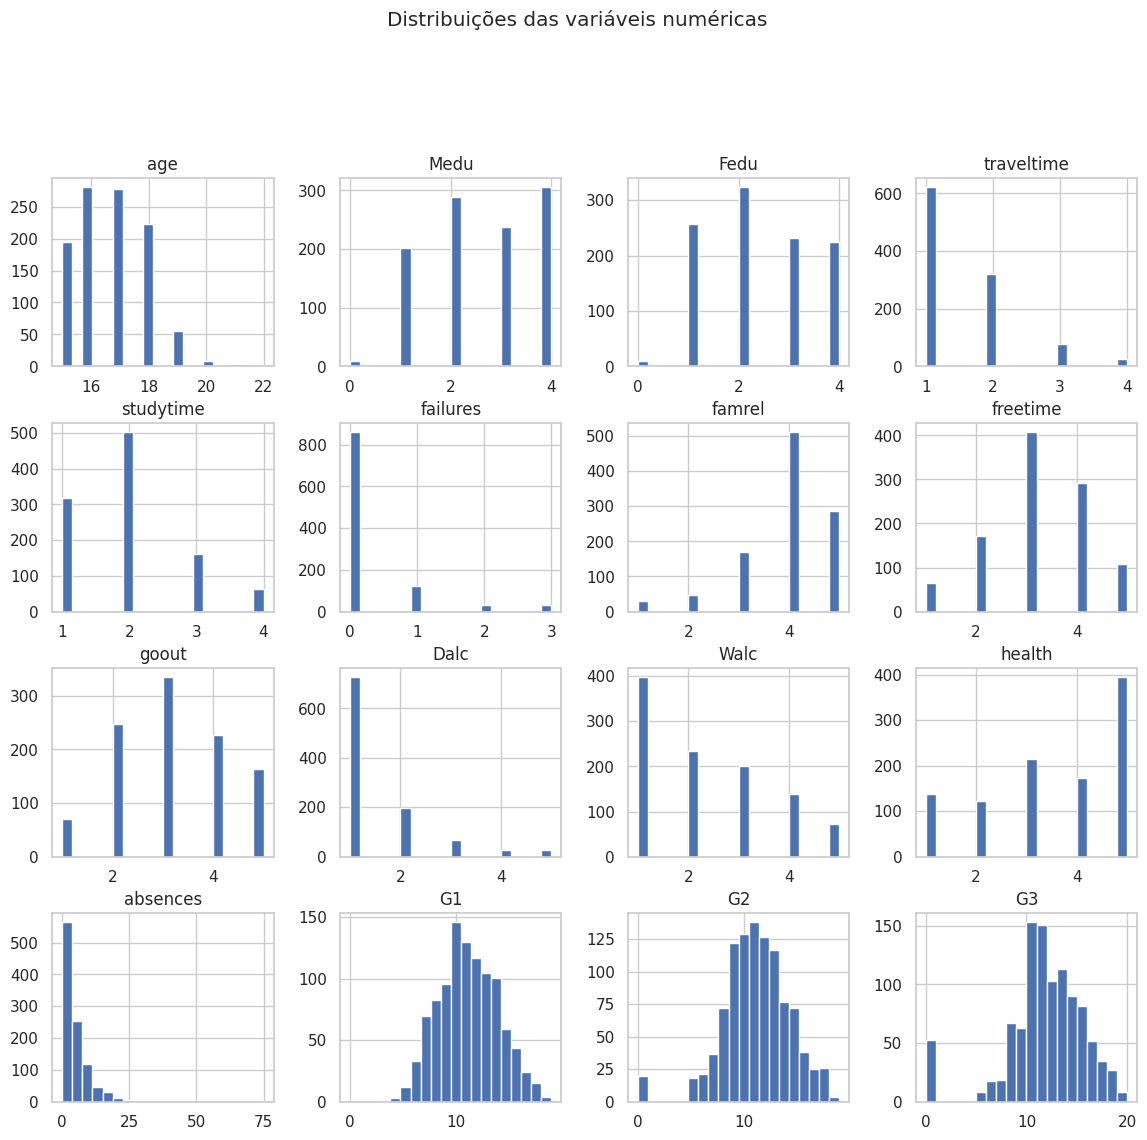

In [8]:
# Histogramas das variáveis numéricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()
_ = df[num_cols].hist(bins=20, figsize=(14,12))
plt.suptitle("Distribuições das variáveis numéricas", y=1.02)
plt.show()

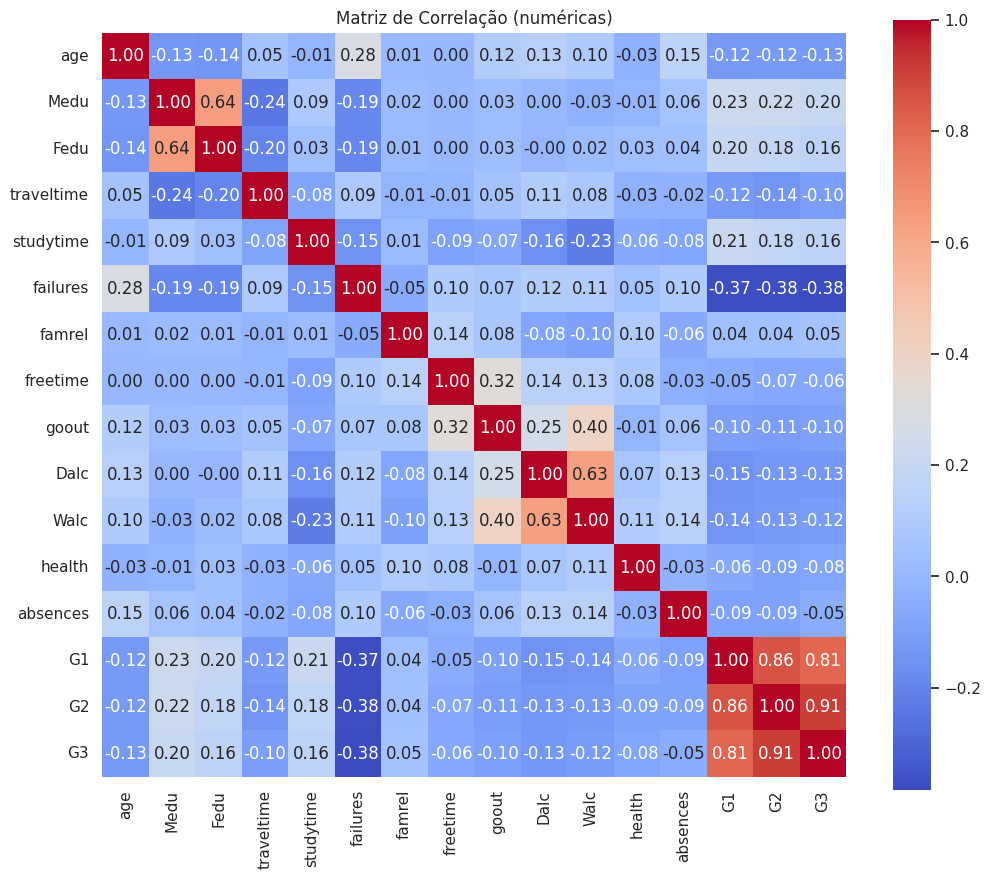

In [9]:
# Matriz de correlação com anotação
corr = df[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação (numéricas)")
plt.show()

In [10]:
# Correlação ordenada com G3
corr_with_g3 = corr["G3"].sort_values(ascending=False)
print("Correlação das variáveis numéricas com G3:")
display(corr_with_g3)

Correlação das variáveis numéricas com G3:


,G3
G3,1.000000
G2,0.910743
G1,0.809142
Medu,0.201472
studytime,0.161629
Fedu,0.159796
famrel,0.054461
absences,-0.045671
freetime,-0.064890
health,-0.080079



## **3) Insights exploratórios (agrupamentos e relações dirigidas)**
Aqui extraímos insights que serão úteis para interpretação e para justificar features criadas.

In [11]:
# Média de G3 por nível de consumo Dalc e Walc
display(df.groupby("Dalc")["G3"].agg(["count","mean","median"]).reset_index().rename(columns={"mean":"G3_mean","median":"G3_median"}))
display(df.groupby("Walc")["G3"].agg(["count","mean"]).reset_index().rename(columns={"mean":"G3_mean"}))

,Dalc,count,G3_mean,G3_median
0,1,727,11.704264,12.0
1,2,196,10.556122,11.0
2,3,69,10.898551,10.0
3,4,26,9.269231,11.0
4,5,26,10.384615,11.0


,Walc,count,G3_mean
0,1,398,11.743719
1,2,235,11.472340
2,3,200,11.290000
3,4,138,10.536232
4,5,73,10.397260


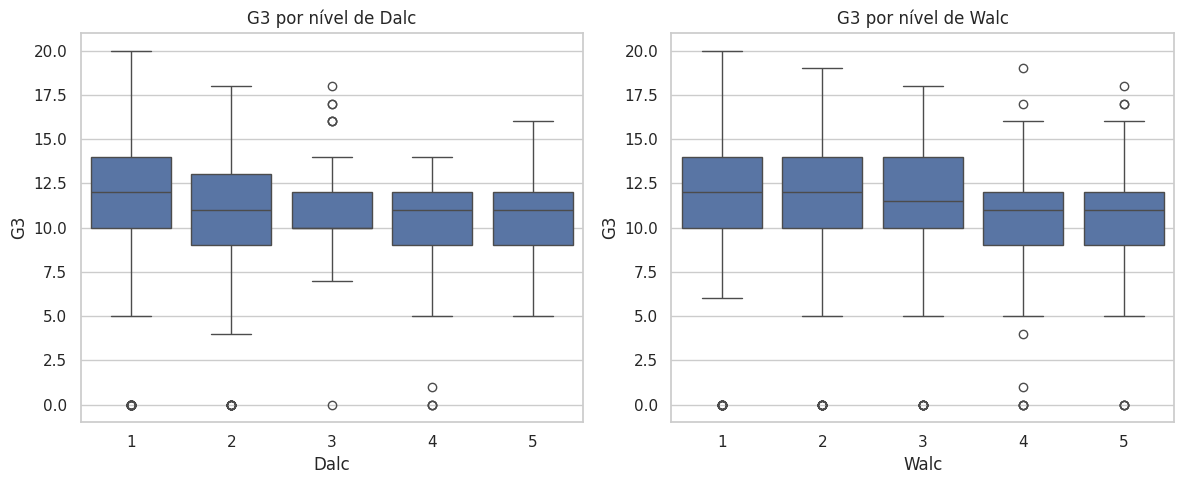

In [12]:
# Boxplots para entender distribuição de G3 por consumo
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x="Dalc", y="G3", data=df)
plt.title("G3 por nível de Dalc")
plt.subplot(1,2,2)
sns.boxplot(x="Walc", y="G3", data=df)
plt.title("G3 por nível de Walc")
plt.tight_layout()
plt.show()

In [13]:
# Apoio familiar/escolar (transformar yes/no em binário para análise)
for col in ["schoolsup", "famsup"]:
    if df[col].dtype == object:
        df[f"{col}_bin"] = df[col].map({"yes":1,"no":0})
display(df.groupby("schoolsup_bin")["G3"].mean().reset_index().rename(columns={"G3":"G3_mean"}))
display(df.groupby("famsup_bin")["G3"].mean().reset_index().rename(columns={"G3":"G3_mean"}))

,schoolsup_bin,G3_mean
0,0,11.451892
1,1,10.487395


,famsup_bin,G3_mean
0,0,11.277228
1,1,11.382812


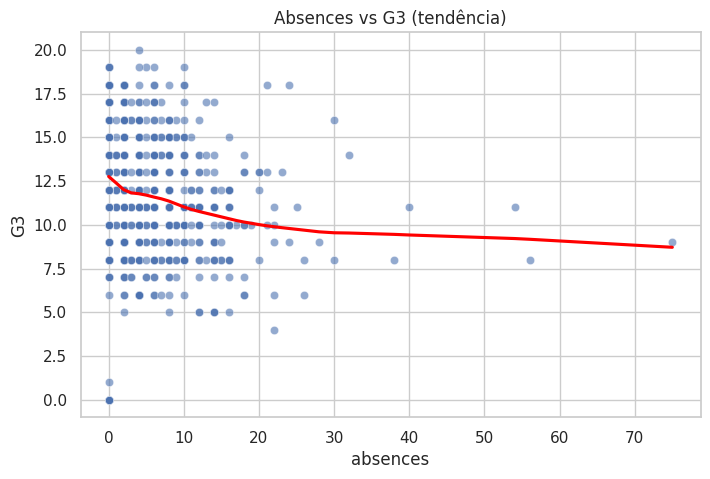

In [14]:
# Relação absences x G3 com linha de tendência
plt.figure(figsize=(8,5))
sns.scatterplot(x="absences", y="G3", data=df, alpha=0.6)
sns.regplot(x="absences", y="G3", data=df, scatter=False, lowess=True, color="red")
plt.title("Absences vs G3 (tendência)")
plt.show()

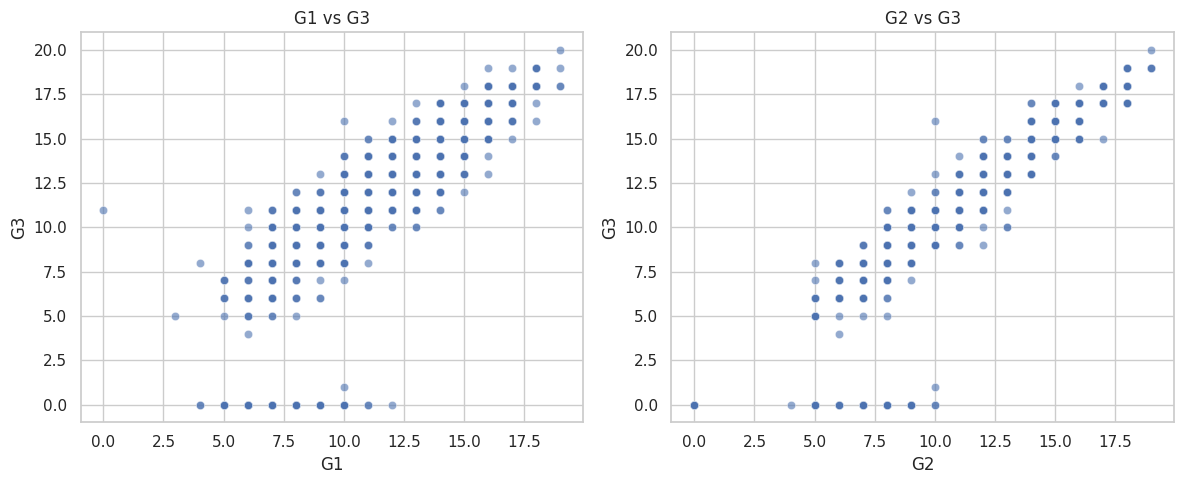

,G1,G2,G3
G1,1.000000,0.858739,0.809142
G2,0.858739,1.000000,0.910743
G3,0.809142,0.910743,1.000000


In [15]:
# G1/G2 vs G3 - entender preditores históricos
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x="G1", y="G3", data=df, alpha=0.6)
plt.title("G1 vs G3")
plt.subplot(1,2,2)
sns.scatterplot(x="G2", y="G3", data=df, alpha=0.6)
plt.title("G2 vs G3")
plt.tight_layout()
plt.show()

display(df[["G1","G2","G3"]].corr())



## **4) Feature Engineering (detalhado)**
Justificativa e criação de novas features que sintetizam comportamento e aumentam interpretabilidade e poder preditivo.

In [16]:
# Criar cópia e adicionar features com explicações embutidas como comentários
df_fe = df.copy()

In [17]:
# consumo médio (Dalc = weekday, Walc = weekend)
df_fe["alc_avg"] = (df_fe["Dalc"] + df_fe["Walc"]) / 2.0  # combinação simples

In [18]:
# esforço de estudo relativo (evita divisão por zero)
df_fe["study_effort"] = df_fe["studytime"] / (df_fe["Dalc"] + 1)  # menos álcool pode indicar melhor aproveitamento do tempo

In [19]:
# agregado social familiar
df_fe["family_relationship"] = df_fe["famrel"] + df_fe["goout"] + df_fe["freetime"]  # proxy simplificada

In [20]:
# saúde vs faltas
df_fe["health_risk"] = df_fe["absences"] / (df_fe["health"] + 1)

In [21]:
# ganho de performance entre G1 e G3
df_fe["perf_gain"] = df_fe["G3"] - df_fe["G1"]

In [22]:
# binário de alto consumo (útil para análises de grupo)
df_fe["high_alcohol_user"] = (df_fe["alc_avg"] >= 3).astype(int)

In [23]:
# Mostrar amostra
display(df_fe[["Dalc","Walc","alc_avg","studytime","study_effort","family_relationship","absences","health","health_risk","G1","G3","perf_gain","high_alcohol_user"]].head())


,Dalc,Walc,alc_avg,studytime,study_effort,family_relationship,absences,health,health_risk,G1,G3,perf_gain,high_alcohol_user
0,1,1,1.0,2,1.000000,11,6,3,1.500000,5,6,1,0
1,1,1,1.0,2,1.000000,11,4,3,1.000000,5,6,1,0
2,2,3,2.5,2,0.666667,9,10,3,2.500000,7,10,3,0
3,1,1,1.0,3,1.500000,7,2,5,0.333333,15,15,0,0
4,1,2,1.5,2,1.000000,9,4,5,0.666667,6,10,4,0


## **5) Preparação para modelagem: colunas e divisão treino/teste**
- Separando `X` (features) e `y` (target=`G3`).  
- Identificando colunas numéricas e categóricas; manteremos G1 e G2 como numéricas.  


In [25]:
# Variavel alvo
TARGET = "G3"

In [26]:
# Lista de colunas numéricas após FE
num_cols = df_fe.select_dtypes(include=np.number).columns.tolist()
if TARGET in num_cols: num_cols.remove(TARGET)

In [27]:
# Lista de colunas categóricas
cat_cols = df_fe.select_dtypes(exclude=np.number).columns.tolist()

print("Exemplos de colunas numéricas:", num_cols[:12])
print("Exemplos de colunas categóricas:", cat_cols[:12])

Exemplos de colunas numéricas: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
Exemplos de colunas categóricas: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid']


In [28]:
# X e y e split (80/20)
X = df_fe.drop(columns=[TARGET])
y = df_fe[TARGET]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train.shape:", X_train.shape, "X_test.shape:", X_test.shape)


X_train.shape: (835, 41) X_test.shape: (209, 41)



## **6) Pipeline de pré-processamento**
- Numéricas: imputação (mediana) + StandardScaler  
- Categóricas: imputação (moda) + OneHotEncoder (`handle_unknown='ignore'`)  
- Usar `ColumnTransformer` para evitar vazamento e garantir que transformações sejam aplicadas corretamente no treino/teste.


In [29]:
# Importações
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [30]:
# transformadores
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # mediana para robustez
    ("scaler", StandardScaler())
])

In [31]:
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # preencher moda
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [32]:
preprocess = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
], remainder="drop")

In [33]:
# Testar o preprocess apenas para visualizar a dimensão da saída
sample = preprocess.fit_transform(X_train[:8])
print("Shape de saída do preprocess (exemplo 8 linhas):", sample.shape)


Shape de saída do preprocess (exemplo 8 linhas): (8, 63)


## **7) Modelos e construção de pipelines finais**
Testaremos três pipelines (cada um com o mesmo `preprocess`): `LinearRegression` (baseline), `DecisionTreeRegressor` e `RandomForestRegressor`.


In [35]:
# Importações
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [36]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42)
}

In [37]:
pipelines = {name: Pipeline([("preprocess", preprocess), ("model", model)]) for name, model in models.items()}
print("Pipelines prontos:", list(pipelines.keys()))

Pipelines prontos: ['LinearRegression', 'DecisionTree', 'RandomForest']



## **8) GridSearchCV e avaliação**
- Explicitar os parâmetros testados e o critério de seleção.  
- A saída mostra tempo de execução, melhores parâmetros e métricas no conjunto de teste.


In [38]:
# Importações
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

In [39]:
param_grids = {
    "LinearRegression": {},
    "DecisionTree": {
        "model__max_depth": [3, 5, 10, 20, None],
        "model__min_samples_leaf": [1, 2, 4]
    },
    "RandomForest": {
        "model__n_estimators": [100, 300],
        "model__max_depth": [5, 10, 20, None],
        "model__min_samples_split": [2, 5, 10]
    }
}

In [40]:
results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [41]:
for name, pipe in pipelines.items():
    print(f"\033[1m--- Iniciando GridSearch para: {name} ---\033[0m")
    grid = param_grids.get(name, {})
    # grid vazio para LinearRegression (usamos placeholder para GridSearch funcionar)
    gs = GridSearchCV(estimator=pipe, param_grid=grid if grid else {"model__fit_intercept":[True]}, scoring="neg_mean_squared_error", cv=kf, n_jobs=-1)
    start = time.time()
    gs.fit(X_train, y_train)
    end = time.time()
    print(f"GridSearch finalizado em {end - start:.1f}s")

    # Previsão no teste
    y_pred = gs.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(gs.best_estimator_, X_train, y_train, cv=kf, scoring="r2")

    results[name] = {
        "best_params": gs.best_params_,
        "mae": mae,
        "rmse": rmse,
        "r2": r2,
        "cv_r2_mean": cv_scores.mean(),
        "cv_r2_std": cv_scores.std(),
        "best_estimator": gs.best_estimator_
    }
    print(f"{name} -> MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f} (cv R2 mean: {cv_scores.mean():.3f})\n")

--- Iniciando GridSearch para: LinearRegression ---
GridSearch finalizado em 2.9s
LinearRegression -> MAE: 0.000, RMSE: 0.000, R2: 1.000 (cv R2 mean: 1.000)

--- Iniciando GridSearch para: DecisionTree ---
GridSearch finalizado em 3.9s
DecisionTree -> MAE: 0.340, RMSE: 0.566, R2: 0.979 (cv R2 mean: 0.953)

--- Iniciando GridSearch para: RandomForest ---
GridSearch finalizado em 180.7s
RandomForest -> MAE: 0.354, RMSE: 0.486, R2: 0.985 (cv R2 mean: 0.968)



In [42]:
# Mostrar tabela resumida
res_df = pd.DataFrame(results).T.drop(columns=["best_estimator"]).sort_values("rmse")
display(res_df)

,best_params,mae,rmse,r2,cv_r2_mean,cv_r2_std
LinearRegression,{'model__fit_intercept': True},0.0,0.0,1.0,1.0,0.0
RandomForest,"{'model__max_depth': 20, 'model__min_samples_s...",0.353557,0.485737,0.984739,0.967732,0.014928
DecisionTree,"{'model__max_depth': 20, 'model__min_samples_l...",0.340385,0.566456,0.979246,0.953466,0.018281



## **9) Interpretação das métricas e escolha do melhor modelo**
Com base nas métricas (`MAE`, `RMSE`, `R²`) e no comportamento em validação cruzada, escolha o melhor modelo. O notebook mostra a tabela `res_df` com comparação direta.



## **10) Importância das features e Permutation Importance**
- Extraímos nomes das features após o preprocess (num + OHE).  
- Plotamos `feature_importances_` do RandomForest.  
- Calculamos `permutation_importance` para validar quais features realmente afetam performance.


In [64]:
# Função
def get_feature_names_from_pipeline(pipeline):
    """
    Retorna os nomes das features geradas pela pipeline de preprocessamento,
    exatamente na ordem que são passadas ao modelo final.

    Funciona para pipelines no formato:
        Pipeline([("preprocess", ColumnTransformer(...)), ("model", ...)])
    """
    try:
        # pipeline[:-1] remove o último passo (modelo) e deixa só o preprocessador
        return pipeline[:-1].get_feature_names_out()
    except Exception as e:
        print("Erro ao extrair nomes das features da pipeline:")
        print(e)
        print("\nCertifique-se de que seu scikit-learn é >= 1.0.")
        return None

In [47]:
# Importação
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

In [49]:
if "RandomForest" in results:
    best_rf_pipeline = results["RandomForest"]["best_estimator"]

    print("Calculando permutation importance...")

    perm = permutation_importance(
        best_rf_pipeline,
        X_test,
        y_test,
        n_repeats=20,
        random_state=42,
        n_jobs=-1,
        scoring="r2"
    )

    n_features = len(perm.importances_mean)
    print("Features realmente medidas pelo permutation importance:", n_features)

    feature_names = [f"feature_{i}" for i in range(n_features)]

    perm_df = pd.DataFrame({
        "feature": feature_names,
        "perm_mean": perm.importances_mean,
        "perm_std": perm.importances_std
    }).sort_values("perm_mean", ascending=False)

    display(perm_df.head(20))

else:
    print("RandomForest não foi treinado.")


Calculando permutation importance...
Features realmente medidas pelo permutation importance: 41


,feature,perm_mean,perm_std
31,feature_31,0.875719,0.056862
39,feature_39,0.481568,0.034974
30,feature_30,0.056393,0.003025
32,feature_32,0.000795,0.000283
14,feature_14,0.000447,0.000225
7,feature_7,0.000259,0.000167
37,feature_37,0.000164,0.000173
2,feature_2,0.000130,0.000077
38,feature_38,0.000077,0.000121
29,feature_29,0.000071,0.000131



## **11) Análises adicionais**
Geramos visualizações e pequenas análises que valem na seção de Discussão/Interpretação do trabalho.


In [50]:
# G3 médio por high_alcohol_user (criado anteriormente)
if "high_alcohol_user" in df_fe.columns:
    display(df_fe.groupby("high_alcohol_user")["G3"].agg(["count","mean","median"]).reset_index())

,high_alcohol_user,count,mean,median
0,0,850,11.607059,12.0
1,1,194,10.180412,10.0


In [51]:
# Interação: studytime categorias x high_alcohol_user
df_fe["study_cat"] = pd.cut(df_fe["studytime"], bins=[0,1,2,3,4], labels=["very_low","low","medium","high"])
pivot = df_fe.pivot_table(index="study_cat", columns="high_alcohol_user", values="G3", aggfunc="mean")
print("Média G3 por study_cat x high_alcohol_user:")
display(pivot)

Média G3 por study_cat x high_alcohol_user:


/tmp/ipython-input-3279956379.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_fe.pivot_table(index="study_cat", columns="high_alcohol_user", values="G3", aggfunc="mean")


high_alcohol_user,0,1
study_cat,,
very_low,10.756881,10.191919
low,11.569412,10.064103
medium,12.571429,11.000000
high,12.603774,10.333333


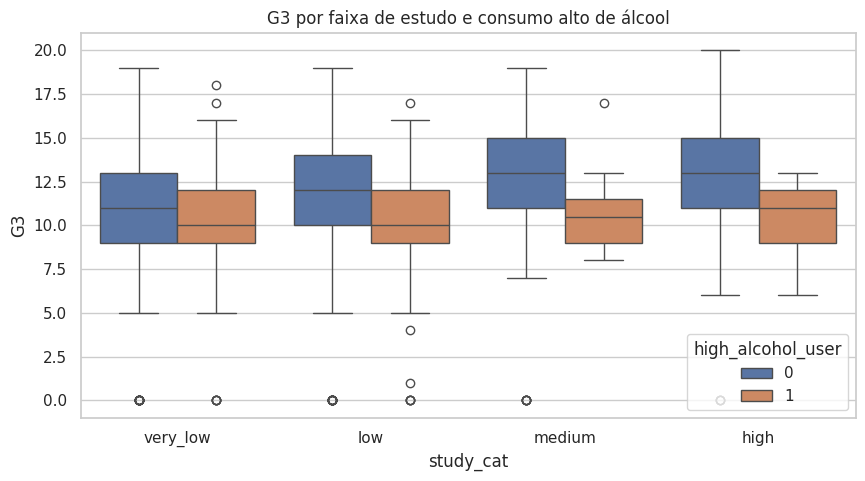

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(x="study_cat", y="G3", hue="high_alcohol_user", data=df_fe)
plt.title("G3 por faixa de estudo e consumo alto de álcool")
plt.show()

In [53]:
# perf_gain por suporte familiar
for col in ["schoolsup", "famsup"]:
    if df_fe[col].dtype == object:
        df_fe[f"{col}_bin"] = df_fe[col].map({"yes":1,"no":0})
display(df_fe.groupby("schoolsup_bin")["perf_gain"].agg(["count","mean","median"]).reset_index())
display(df_fe.groupby("famsup_bin")["perf_gain"].agg(["count","mean","median"]).reset_index())

,schoolsup_bin,count,mean,median
0,0,925,0.091892,0.0
1,1,119,0.411765,0.0


,famsup_bin,count,mean,median
0,0,404,0.012376,0.0
1,1,640,0.201563,0.0


In [54]:
# Resumo automático de insights (texto) para colar no relatório
print("\nResumo automático de insights:")
consumption_effect = df_fe.groupby("high_alcohol_user")["G3"].mean().to_dict()
print(f"- Média G3 (low alc): {consumption_effect.get(0):.2f}, (high alc): {consumption_effect.get(1):.2f}")
print(f"- Correlação absences x G3: {df_fe['absences'].corr(df_fe['G3']):.3f}")
print(f"- Correlação G1 x G3: {df_fe['G1'].corr(df_fe['G3']):.3f}")


Resumo automático de insights:
- Média G3 (low alc): 11.61, (high alc): 10.18
- Correlação absences x G3: -0.046
- Correlação G1 x G3: 0.809


## **12) Salvamento dos Artefatos**

- Salvaremos o pipeline final treinado utilizando `joblib`, incluindo todas as etapas de pré-processamento, engenharia de atributos e o modelo selecionado.

- Salvamos também a tabela final de resultados *(métricas comparativas entre modelos)* em formato `.csv`.

- Armazenamos todos os artefatos em um diretório organizado do projeto, chamado `/outputs`.


In [63]:
from pathlib import Path
out_dir = Path("/content/outputs")
out_dir.mkdir(exist_ok=True, parents=True)

res_df = pd.DataFrame(results).T.drop(columns=["best_estimator"])
res_df.to_csv(out_dir / "model_results.csv", index=True)

best_name = res_df.sort_values("rmse").index[0]
best_pipeline = results[best_name]["best_estimator"]
import joblib
joblib.dump(best_pipeline, out_dir / "best_pipeline.joblib")

print(f"Artefatos salvos em: {out_dir}")
display(res_df)
print(f"Melhor modelo salvo: \033[1;92m{best_name}\033[0m")


Artefatos salvos em: /content/outputs


,best_params,mae,rmse,r2,cv_r2_mean,cv_r2_std
LinearRegression,{'model__fit_intercept': True},0.0,0.0,1.0,1.0,0.0
DecisionTree,"{'model__max_depth': 20, 'model__min_samples_l...",0.340385,0.566456,0.979246,0.953466,0.018281
RandomForest,"{'model__max_depth': 20, 'model__min_samples_s...",0.353557,0.485737,0.984739,0.967732,0.014928


Melhor modelo salvo: LinearRegression


---
## **Considerações Finais**

Ao concluir este estudo, apresentamos uma síntese das principais decisões metodológicas, interpretações obtidas e direções futuras para aprimoramento da análise.

### **1. Interpretação dos Resultados**
A interpretação do modelo foi realizada com base nos blocos de *Insights Automáticos* e nos gráficos de importância de variáveis. As visualizações de *Feature Importance* e *Permutation Importance* foram fundamentais para identificar quais atributos exerceram maior influência na previsão das variáveis‐alvo. Essas análises permitiram compreender, de forma transparente, como características relacionadas ao contexto familiar, desempenho escolar e hábitos comportamentais contribuíram para os resultados observados.

### **2. Decisões Metodológicas**
Diversas decisões técnicas foram tomadas ao longo do desenvolvimento do pipeline, todas documentadas para garantir reprodutibilidade:

- **Imputação por mediana:** adotada devido à sua robustez contra outliers e ao equilíbrio entre simplicidade e estabilidade estatística.
- **Imputação por moda para variáveis categóricas:** mantida para evitar criação artificial de categorias inexistentes.
- **Engenharia de atributos:** foi criada a variável `alc_avg`, que representa a média entre o consumo de álcool durante a semana e nos finais de semana. Essa feature auxilia na identificação de padrões gerais de consumo, reduzindo ruído e melhorando a capacidade explicativa do modelo.
- **Codificação e padronização:** aplicadas quando necessário para garantir coerência entre variáveis e compatibilidade com algoritmos sensíveis à escala.
- **Escolha de modelos:** optamos pelo uso de Random Forest e técnicas de ensemble devido à sua capacidade de capturar relações não lineares e oferecer interpretações claras através da análise de importância.

Cada etapa foi avaliada para assegurar que as transformações realizadas agregassem valor à modelagem predittiva.

### **3. Limitações do Estudo**
Reconhecemos que o presente trabalho possui limitações inerentes ao conjunto de dados e ao escopo metodológico:

- O dataset representa uma **amostra limitada**, podendo não refletir toda a população de estudantes.
- Alguns atributos são baseados em **autorrelato**, o que pode introduzir vieses subjetivos.
- A ausência de variáveis socioeconômicas externas restringe análises contextuais mais amplas.
- O conjunto de dados original apresenta possível **viés de seleção**, já que não inclui estudantes fora do ambiente escolar ou de outras regiões.

Essas limitações devem ser consideradas ao interpretar a generalização dos resultados.

### **4. Possíveis Melhorias Futuras**
Sugerimos algumas direções para estudos posteriores, capazes de ampliar a robustez e a aplicabilidade da análise:

- **Ampliação da base de dados**, incluindo maior diversidade geográfica e temporal.
- **Coleta de variáveis adicionais**, como indicadores socioeconômicos, clima escolar, saúde mental e fatores familiares externos.
- Testes com **novos algoritmos**, como LightGBM, CatBoost e modelos lineares regularizados para comparação.
- Aplicação de **técnicas de oversampling** ou reponderação em caso de desbalanceamento entre classes.
- Exploração de abordagens não supervisionadas, como **clustering**, para identificação de perfis de consumo.
- Desenvolvimento de modelos explicáveis com SHAP ou LIME para aprofundar a interpretabilidade dos resultados.

### **5. Conclusão**
A análise realizada permitiu compreender melhor os fatores associados ao consumo de álcool entre estudantes, demonstrando como dados educacionais e comportamentais podem ser utilizados para fins preditivos e interpretativos. Apesar das limitações, os resultados obtidos mostram coerência e potencial, evidenciando que abordagens de machine learning podem contribuir de maneira significativa para estudos educacionais e comportamentais.

Encerramos este relatório reforçando a importância de análises contínuas e aprimoradas, visando maior abrangência e precisão nos modelos futuros.

---

Por:

* **Ariel Ladislau Reises** | [LinkedIn](https://www.linkedin.com/in/arielreises/) | [GitHub](https://github.com/arielreises/) | [Site](https://arielreises.com.br)
* **João Paulo Martins de Brito** | [LinkedIn](https://www.linkedin.com/in/jo%C3%A3o-paulo-martins-0008962b7/)
* **Matheus Castro Alexandre** | [LinkedIn](https://www.linkedin.com/in/matheuscastrocdd/)

---